In [1]:
## Load packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [3]:
path = '../input/'
state_ts = pd.read_csv('State_time_series.csv',parse_dates=['Date'])
print('Number of rows and columns in state ts:',state_ts.shape)
state_ts1=state_ts.copy()

Number of rows and columns in state ts: (13026, 86)


In [4]:
state_ts.head()

,Date,RegionName,DaysOnZillow_AllHomes,HomesSoldAsForeclosuresRatio_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,99500.0,79500.0,79000.0,140200.0,NaN,NaN,NaN,NaN,NaN
1,1996-04-30,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67100.0,78900.0,103600.0,107500.0,168700.0,NaN,NaN,NaN,NaN,NaN
2,1996-04-30,Arkansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38400.0,70300.0,64400.0,64500.0,115200.0,NaN,NaN,NaN,NaN,NaN
3,1996-04-30,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95100.0,136100.0,157900.0,162000.0,270600.0,NaN,NaN,NaN,NaN,NaN
4,1996-04-30,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82700.0,99400.0,128100.0,133600.0,209300.0,NaN,NaN,NaN,NaN,NaN


In [5]:
state_ts.columns

Index(['Date', 'RegionName', 'DaysOnZillow_AllHomes',
       'HomesSoldAsForeclosuresRatio_AllHomes',
       'InventorySeasonallyAdjusted_AllHomes', 'InventoryRaw_AllHomes',
       'MedianListingPricePerSqft_1Bedroom',
       'MedianListingPricePerSqft_2Bedroom',
       'MedianListingPricePerSqft_3Bedroom',
       'MedianListingPricePerSqft_4Bedroom',
       'MedianListingPricePerSqft_5BedroomOrMore',
       'MedianListingPricePerSqft_AllHomes',
       'MedianListingPricePerSqft_CondoCoop',
       'MedianListingPricePerSqft_DuplexTriplex',
       'MedianListingPricePerSqft_SingleFamilyResidence',
       'MedianListingPrice_1Bedroom', 'MedianListingPrice_2Bedroom',
       'MedianListingPrice_3Bedroom', 'MedianListingPrice_4Bedroom',
       'MedianListingPrice_5BedroomOrMore', 'MedianListingPrice_AllHomes',
       'MedianListingPrice_CondoCoop', 'MedianListingPrice_DuplexTriplex',
       'MedianListingPrice_SingleFamilyResidence',
       'MedianPctOfPriceReduction_AllHomes',
       'Medi

<AxesSubplot:>

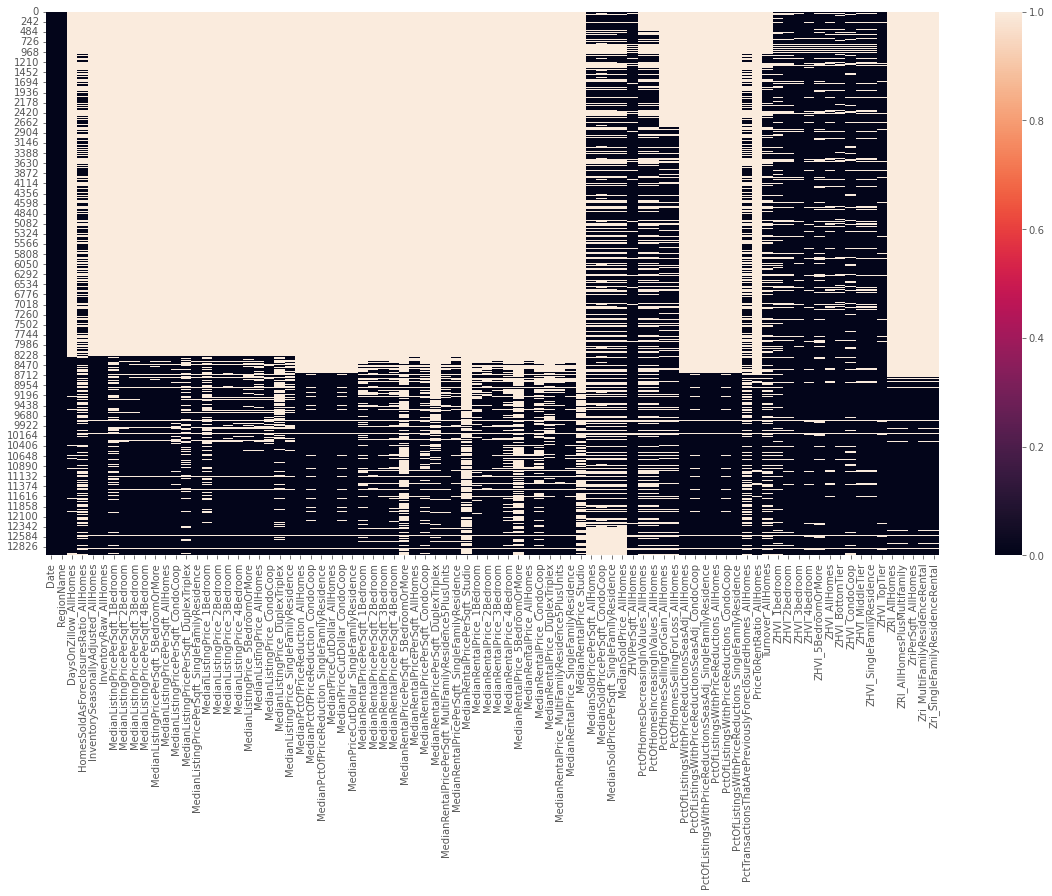

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(state_ts.isnull())

In [7]:
print('Date range:{} to {}'.format(state_ts['Date'].min(),state_ts['Date'].max()))
print('Number of States',state_ts['RegionName'].nunique())

Date range:1996-04-30 00:00:00 to 2017-08-31 00:00:00
Number of States 52


## Resample

In [8]:
state_month = state_ts.resample('M',on='Date').mean()
state_month = state_month.reset_index()
state_month.shape

(257, 85)

In [68]:
state_month.head()

,Date,DaysOnZillow_AllHomes,HomesSoldAsForeclosuresRatio_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,1996-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67092.307692,91136.842105,104675.675676,107605.405405,168282.926829,NaN,NaN,NaN,NaN,NaN
1,1996-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66835.000000,91148.717949,104239.473684,107131.578947,167433.333333,NaN,NaN,NaN,NaN,NaN
2,1996-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66677.500000,91158.974359,104326.315789,107223.684211,167623.809524,NaN,NaN,NaN,NaN,NaN
3,1996-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66560.000000,91282.051282,104426.315789,107334.210526,167864.285714,NaN,NaN,NaN,NaN,NaN
4,1996-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66512.500000,91456.410256,104547.368421,107450.000000,168042.857143,NaN,NaN,NaN,NaN,NaN


In [9]:
state_vise = state_ts.groupby(['RegionName']).mean()
state_vise.shape

(52, 84)

In [69]:
state_vise.head()

,DaysOnZillow_AllHomes,HomesSoldAsForeclosuresRatio_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,MedianListingPricePerSqft_AllHomes,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
RegionName,,,,,,,,,,,,,,,,,,,,,
Alabama,129.528846,1.999584,31541.619565,31535.543478,172.898517,92.951568,87.934050,98.446153,102.294024,89.771059,...,62869.072165,131057.976654,109748.638132,109182.101167,203601.556420,962.804878,962.853659,0.626854,975.768293,962.609756
Alaska,97.005495,NaN,3640.880435,3639.021739,172.924713,162.060496,156.709478,152.284876,125.445328,156.362119,...,160806.521739,165362.608696,230007.826087,241513.043478,327403.333333,1768.064103,1739.705128,1.290641,1609.576923,1788.743590
Arizona,87.296703,9.205531,42656.913043,42634.173913,132.572598,111.260945,126.852545,124.649016,126.854144,129.694673,...,107303.112840,121630.350195,168131.517510,175503.112840,295979.377432,1183.573171,1169.292683,0.754341,1010.268293,1204.109756
Arkansas,123.030220,1.117645,18793.065217,18783.467391,110.376897,74.611374,84.863456,98.000799,104.099045,86.605089,...,52174.708171,111120.622568,92783.657588,92661.478599,166315.564202,899.365854,894.817073,0.603805,799.085366,898.085366
California,79.673077,6.915324,97409.358696,97317.021739,376.683130,280.496346,245.962050,242.967295,254.261162,264.384711,...,190181.322957,309006.614786,345159.922179,352536.186770,626127.237354,2116.597561,2094.219512,1.370293,1995.658537,2127.451220


## Days On Zillow AllHomes

"The median days on market of homes sold within a given month, including foreclosure re-sales. The latest data is for one month prior to the current ZHVI (e.g., if the most current month for ZHVI data is January, the most current month for Days on Zillow data will be December)."

In [10]:
data = [go.Scatter(x=state_month['Date'],y = state_month['DaysOnZillow_AllHomes'])]
#layout = {'title': 'Days On Zillow All Homes', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-09-01']}}
layout = dict(
    title='Days On Zillow All Homes',
    xaxis=dict(
        range=['2010-01-01','2017-09-01'],
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                    label='YTD',
                    step='year',
                    stepmode='todate'),
                dict(count=1,
                    label='1y',
                    step='year',
                    stepmode='backward'),
                #dict(step='all')
            ])
        ),
        rangeslider=dict(range=['2010-01-01','2017-09-01']),
        type='date'
    )
)
py.iplot({'data':data,
         'layout': layout})

## Median Sold Price Of All Home

In [14]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianSoldPrice_AllHomes'], name = 'Sold Price All Home')]
layout = {'title': 'Median Sold Price' }

py.iplot({'data':data,'layout':layout})

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
RegionName,Alaska,Idaho,Indiana,Kansas,Louisiana,Mississippi,Missouri,Montana,NewMexico,NewYork,NorthDakota,SouthDakota,Tennessee,Texas,UnitedStates,Utah,Wyoming
MedianSoldPrice_AllHomes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


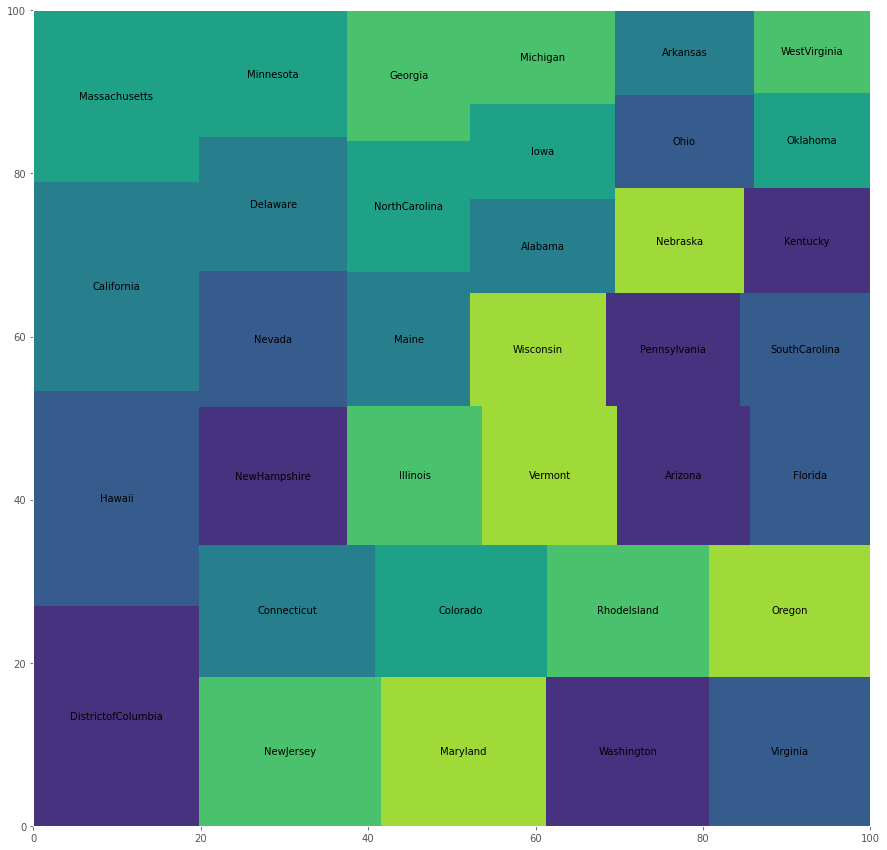

In [15]:
plt.figure(figsize=(15,15))
k = state_vise['MedianSoldPrice_AllHomes'].dropna()
k = k.sort_values(ascending=False)
squarify.plot(sizes=k, label=k.index, color=sns.color_palette('viridis'),)
# Missing value
k = state_vise['MedianSoldPrice_AllHomes']
k = k[k.isnull()]
k.reset_index().T

## Price To Rent Ratio,
"This ratio is first calculated at the individual home level, where the estimated home value is divided by 12 times its estimated monthly rent price. The the median of all home-level price-to-rent ratios for a given region is then calculated."

In [16]:
data = [go.Scatter(x = state_month['Date'],y = state_month['PriceToRentRatio_AllHomes'])]
layout = {'title':'Price/Rent All homes','xaxis':{'range':['2010-01-01','2017-12-01']}}
py.iplot({'data':data,'layout':layout})

### Home Value By Year

In [18]:
data = [go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesDecreasingInValues_AllHomes'],name = 'Decreasing'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesIncreasingInValues_AllHomes'], name = 'Increasing'),
       ]
       
layout = {'title': 'Percentage Increse vs Decressing Value Of Homes', 'font': dict(size=16),}

py.iplot({'data':data,'layout': layout})

###### The percentage of homes in an given region with values that have decreased in the past year
###### The percentage of homes in an given region with values that have increased in the past year

## Percentage Gain or Loss of Sold Home

In [19]:
data = [go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesSellingForGain_AllHomes'], name = 'Selling Gain'),
        go.Scatter(x = state_month['Date'], y = state_month['PctOfHomesSellingForLoss_AllHomes'], name = 'Selling Loss'),
       ]
       
layout = {'title': 'Percentage Gain vs Loss Sold of Home ', 'font': dict(size=16),}

py.iplot({'data':data,'layout': layout})

##### The percentage of homes in an area that sold for a price higher than the previous sale price
##### The percentage of homes in an area that sold for a price lower than the previous sale price

### 1.The year 2008 is year of recession, so value of home decreased so much.
### 2.The home sold in zillow with profit is more than 73% to 98%

## Median value of own home per sqaure fit

In [20]:
data = [go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_1Bedroom'],name = '1 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_2Bedroom'], name = '2 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_3Bedroom'], name = '3 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_4Bedroom'], name = '4 Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_5BedroomOrMore'], name = '5 or more Bedroom'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_CondoCoop'], name = 'Condo Coop'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_DuplexTriplex'], name = 'Duplex Triplex'),
        go.Scatter(x = state_month['Date'], y = state_month['MedianListingPricePerSqft_SingleFamilyResidence'], name = 'Single Family'),
       ]
       
layout = {'title': 'Median Listing Price$/sqft', 'font': dict(size=16),'xaxis':{'range':['2009-01-01','2017-10-01']}}

py.iplot({'data':data,'layout': layout})

## Median value of own home per sqaure fit

In [21]:
data = [go.Scatter(x = state_month['Date'],y = state_month['ZHVIPerSqft_AllHomes'])]
layout = {'title':'Median of the value of all homes per square foot',}
py.iplot({'data':data,'layout':layout})

# Modeling

In [22]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

In [23]:
state_ts = state_ts1.set_index('Date')
ts = state_ts['MedianSoldPrice_AllHomes']
ts.head()

Date
1996-04-30     86725.0
1996-04-30    102300.0
1996-04-30     68550.0
1996-04-30    155725.0
1996-04-30    127845.0
Name: MedianSoldPrice_AllHomes, dtype: float64

<AxesSubplot:xlabel='Date'>

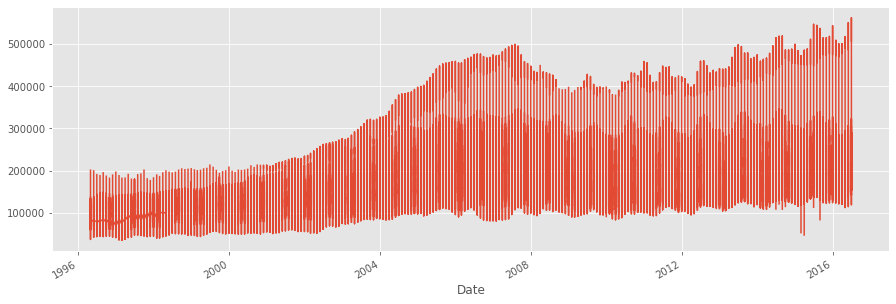

In [24]:
plt.figure(figsize=(15,5))
ts.plot()

<AxesSubplot:xlabel='Date'>

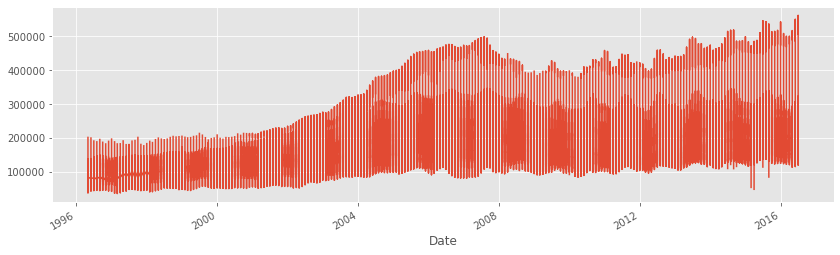

In [25]:
plt.figure(figsize=(14,4))
ts.plot()

<AxesSubplot:xlabel='Date'>

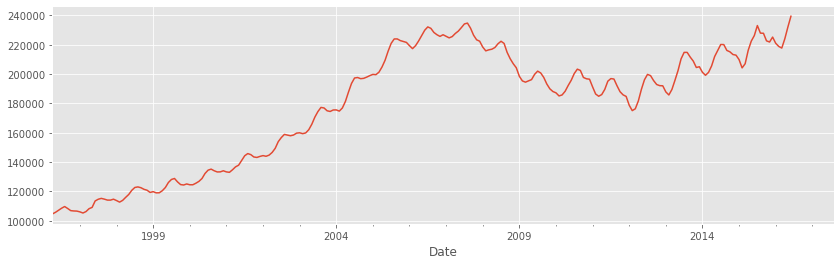

In [26]:
plt.figure(figsize=(14,4))
ts = ts.resample('M').mean()
ts.plot()

In [27]:
ts = ts.ffill()

Perfom Dickey fuller test
Test Statistic                  -2.113292
p-value                          0.239204
#Lags Used                      12.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


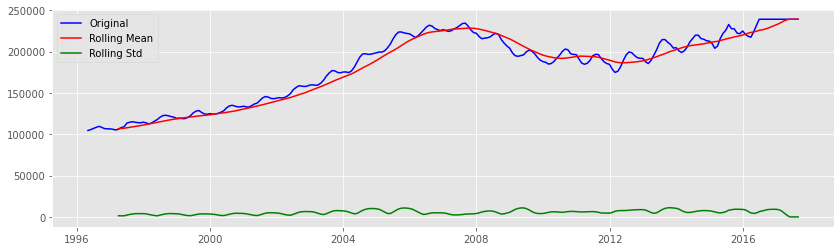

In [28]:
def test_stationarity(timeseries):
    
    #rolling statics
    rol_mean = timeseries.rolling(window = 12).mean()
    rol_std = timeseries.rolling(window = 12).std()
    
    #plot rolling statistics
    plt.figure(figsize=(14,4))
    plt.plot(ts, color = 'b', label = 'Original')
    plt.plot(rol_mean, color = 'r', label = 'Rolling Mean')
    plt.plot(rol_std, color = 'g', label = 'Rolling Std')
    plt.legend(loc='best')
    
    # Dickey fuller test
    print('Perfom Dickey fuller test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(ts)

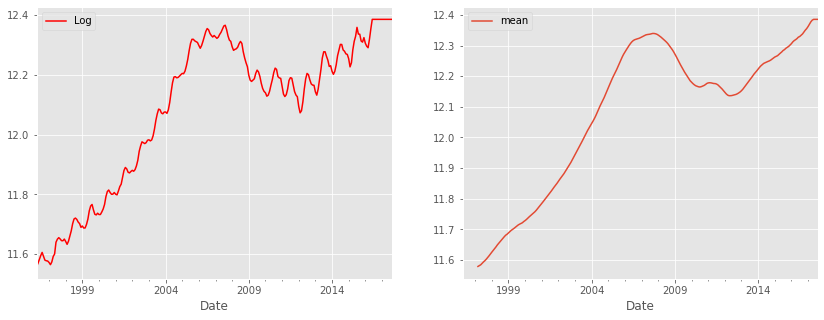

In [29]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = ax.flatten()

ts_log = np.log(ts)
ts_log.plot(ax=ax1, label = 'Log',color = 'r')
ax1.legend(loc = 'best')

ts_ma = ts_log.rolling(12).mean()
ts_ma.plot(ax = ax2, label = 'mean')
ax2.legend(loc = 'best')

<AxesSubplot:xlabel='Date'>

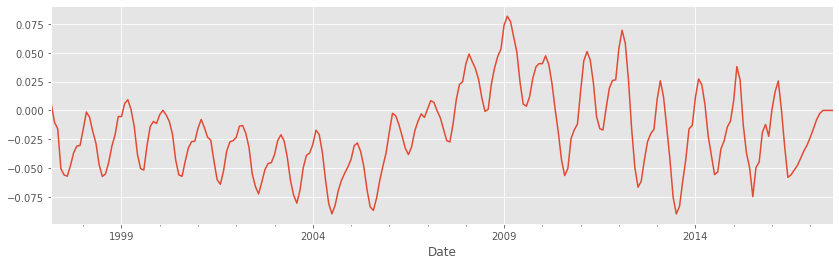

In [30]:
plt.figure(figsize=(14,4))
ts_dif = ts_ma - ts_log
ts_dif = ts_dif.dropna() 
ts_dif.plot()

Perfom Dickey fuller test
Test Statistic                  -2.613145
p-value                          0.090311
#Lags Used                      12.000000
Number of Observations Used    233.000000
Critical Value (1%)             -3.458731
Critical Value (5%)             -2.874026
Critical Value (10%)            -2.573424
dtype: float64


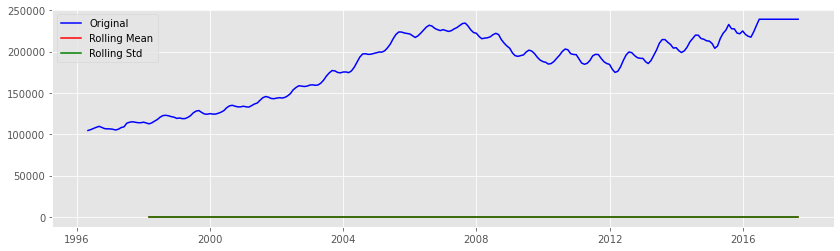

In [31]:
test_stationarity(ts_dif)

## Eliminating Trend and seasonality

<AxesSubplot:xlabel='Date'>

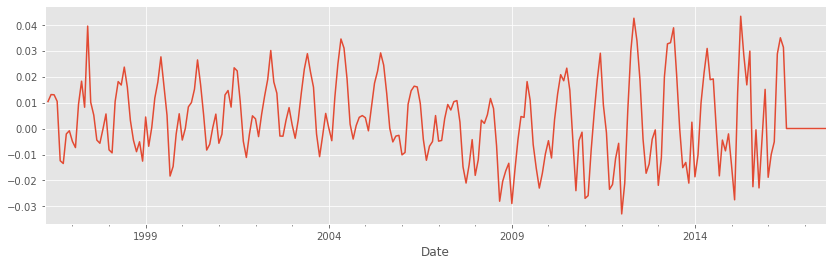

In [32]:
ts_log_dif = ts_log - ts_log.shift()
plt.figure(figsize=(14,4))
ts_log_dif.plot()

Perfom Dickey fuller test
Test Statistic                  -1.614597
p-value                          0.475563
#Lags Used                      11.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


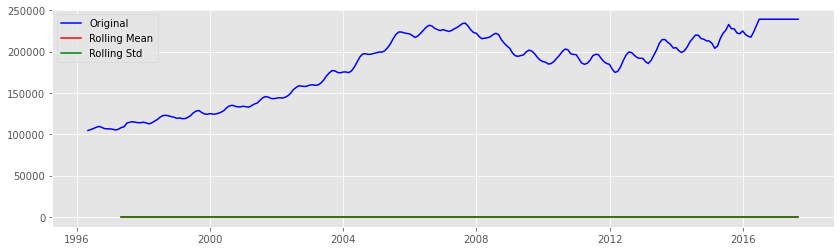

In [33]:
ts_log_dif.dropna(inplace = True)
test_stationarity(ts_log_dif)

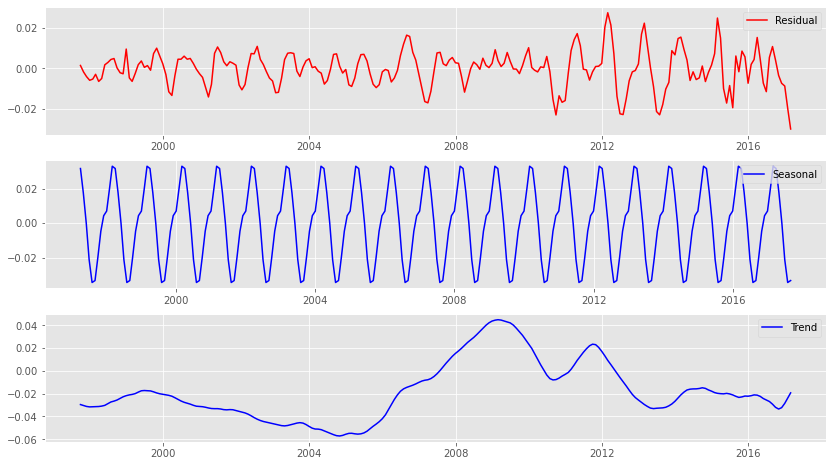

In [34]:
docom = seasonal_decompose(ts_dif)
fig,ax = plt.subplots(3,1,figsize=(14,8))
ax
ax[0].plot(docom.resid,label = 'Residual', color = 'r')
ax[0].legend(loc= 'best')
ax[1].plot(docom.seasonal, label = 'Seasonal', color = 'b')
ax[1].legend(loc = 'best')
ax[2].plot(docom.trend,  label = 'Trend', color = 'b')
ax[2].legend(loc = 'best')

Perfom Dickey fuller test
Test Statistic                -8.836579e+00
p-value                        1.712689e-14
#Lags Used                     5.000000e+00
Number of Observations Used    2.280000e+02
Critical Value (1%)           -3.459361e+00
Critical Value (5%)           -2.874302e+00
Critical Value (10%)          -2.573571e+00
dtype: float64


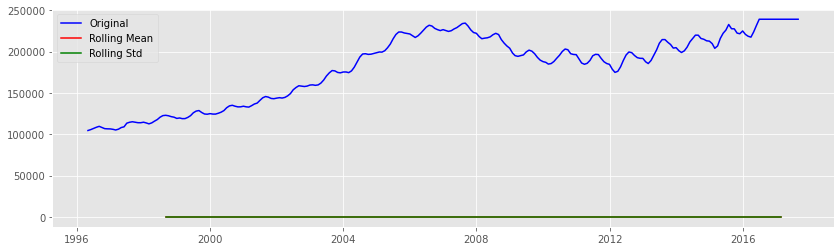

In [35]:
test_stationarity(docom.resid.dropna())

In [36]:
# ACF
lag_acf = acf(ts_dif,nlags=20)
#PACF
lag_pacf = pacf(ts_dif, nlags=20, method='ols')

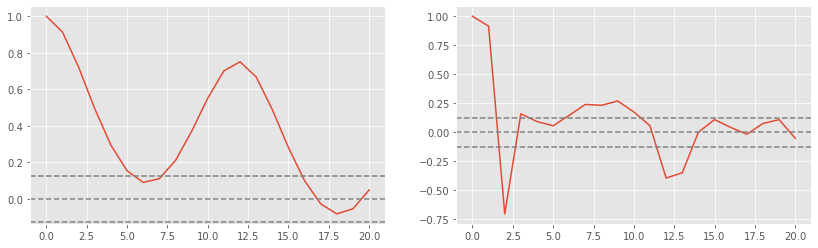

In [37]:
fig,ax = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = ax.flatten()
ax1.plot(lag_acf)
ax1.axhline(y=0,linestyle='--',color= 'gray')
ax1.axhline(y= - 1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')
ax1.axhline(y=  1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')

ax2.plot(lag_pacf,)
ax2.axhline(y=0,linestyle = '--', color = 'gray')
ax2.axhline(y = -1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')
ax2.axhline(y = 1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')

In [54]:
ts_dif.head()

Date
1997-03-31    0.005136
1997-04-30   -0.010306
1997-05-31   -0.015892
1997-06-30   -0.050541
1997-07-31   -0.056076
Freq: M, Name: MedianSoldPrice_AllHomes, dtype: float64

In [55]:
ts_dif.shape

(246,)

In [48]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_dif, order = (5,1,1))
model_fit = model.fit()
print(model_fit.summary())

                                  SARIMAX Results                                   
Dep. Variable:     MedianSoldPrice_AllHomes   No. Observations:                  246
Model:                       ARIMA(5, 1, 1)   Log Likelihood                 793.841
Date:                      Sun, 24 Jul 2022   AIC                          -1573.681
Time:                              23:16:16   BIC                          -1549.172
Sample:                          03-31-1997   HQIC                         -1563.812
                               - 08-31-2017                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3594      0.099     13.714      0.000       1.165       1.554
ar.L2         -0.7461      0.109     -6.838      0.000      -0.960      -0.532
ar.L

C:\Users\sid\AppData\Local\Continuum\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



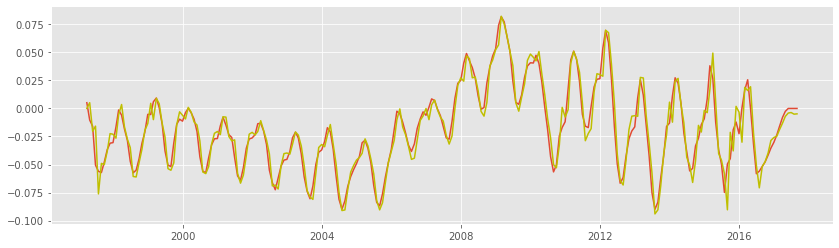

In [53]:
plt.figure(figsize=(14,4))
plt.plot(ts_dif)
plt.plot(model_fit.fittedvalues,color = 'y')